<a href="https://colab.research.google.com/github/sarisppp/PJ63_CE18/blob/master/ML_model_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ทำการ import Envoloment แล้ว โหลดข้อมูล**

In [59]:

import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import MinMaxScaler


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
used_features = ['Timestamp','SET50.Close','EMAV(5)','Vol','EMAV(Vol,5)','MACD(13,5,5)','EMAV(MACD,5)','RSI(14)']
data = pd.read_excel("/content/drive/My Drive/Set50_20190314_20200820_1minute (1).xlsx",usecols =used_features)
data.info()
data.set_index("Timestamp",inplace=True)
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55920 entries, 0 to 55919
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     55920 non-null  object 
 1   SET50.Close   55920 non-null  float64
 2   EMAV(5)       55916 non-null  float64
 3   Vol           55920 non-null  int64  
 4   RSI(14)       55907 non-null  float64
 5   MACD(13,5,5)  55908 non-null  float64
 6   EMAV(Vol,5)   55916 non-null  float64
 7   EMAV(MACD,5)  55904 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.4+ MB


,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)"
Timestamp,,,,,,,
13/03/19 14:26:00,1081.38,NaN,7698,NaN,NaN,NaN,NaN
13/03/19 14:27:00,1079.86,NaN,817,NaN,NaN,NaN,NaN
13/03/19 14:28:00,1081.50,NaN,2935,NaN,NaN,NaN,NaN
13/03/19 14:29:00,1081.32,NaN,94,NaN,NaN,NaN,NaN
13/03/19 14:30:00,1081.37,1081.0860,1900,NaN,NaN,2688.8894,NaN
13/03/19 14:31:00,1081.66,1081.2773,703,NaN,NaN,2026.9929,NaN
13/03/19 14:32:00,1081.42,1081.3249,3331,NaN,NaN,2461.7313,NaN
13/03/19 14:33:00,1080.90,1081.1833,6272,NaN,NaN,3731.9482,NaN
13/03/19 14:34:00,1081.01,1081.1255,1922,NaN,NaN,3128.7555,NaN


**** ฟังชั่นเตรียมข้อมูลสำหรับการ train****

In [61]:
def signal(data,periods=16):
  data['signal']=0
  for index,row in data.iterrows():
        #if index >= periods:
            if row['Vol'] > row['EMAV(Vol,5)'] :
              if row['SET50.Close']>row['EMAV(5)']:                  
                  if row['MACD(13,5,5)']>row['EMAV(MACD,5)'] and row['RSI(14)']<70:
                    signal=1
                  else:
                    signal=0
              if row['SET50.Close']<row['EMAV(5)']:               
                if row['MACD(13,5,5)']<row['EMAV(MACD,5)'] and row['RSI(14)']>30:
                  signal=-1
                else :
                  signal=0
            else:
              signal=0
            data.at[index, 'signal']= signal
    
     
  return data

**นำข้อมูลเข้าฟังชั่น**

In [73]:
data_new=data
data_new=signal(data_new)
data_new.tail(50)



,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)",signal_predict,signal
Timestamp,,,,,,,,,
20/08/20 15:52:00,840.27,840.3825,4753,48.7603,-0.0315,3446.6492,0.013,-1,-1
20/08/20 15:53:00,841.12,840.6284,2120,55.5132,0.1134,3004.5588,0.047,0,0
20/08/20 15:54:00,841.27,840.8422,2422,56.6002,0.2194,2810.4358,0.104,0,0
20/08/20 15:55:00,840.05,840.5782,1990,46.6222,0.0372,2536.8716,0.082,0,0
20/08/20 15:56:00,840.24,840.4654,3606,48.1551,-0.0325,2893.2474,0.044,-1,-1
20/08/20 15:57:00,840.42,840.4503,2074,49.6308,-0.0365,2620.1036,0.017,0,0
20/08/20 15:58:00,840.60,840.5002,3599,51.1290,-0.0028,2946.2434,0.010,0,0
20/08/20 15:59:00,841.27,840.7568,2928,56.3350,0.1442,2940.1819,0.055,0,0
20/08/20 16:00:00,840.84,840.7845,4400,52.4717,0.1395,3426.8723,0.083,1,1


**clean data**

In [63]:
data_new=data_new.dropna()
data_X = data_new.drop('signal',axis=1)
data_Y = data_new.signal

**Model กับ split ข้อมูล แล้ว Train**

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.20, random_state=0)
print(train_X.info())
print("=====================================")
print(train_y.head())

RandomForest = RandomForestClassifier(n_estimators=100)
RandomForest.fit(train_X, train_y)

<class 'pandas.core.frame.DataFrame'>
Index: 44723 entries, 17/12/19 11:07:00 to 13/09/19 14:34:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SET50.Close   44723 non-null  float64
 1   EMAV(5)       44723 non-null  float64
 2   Vol           44723 non-null  int64  
 3   RSI(14)       44723 non-null  float64
 4   MACD(13,5,5)  44723 non-null  float64
 5   EMAV(Vol,5)   44723 non-null  float64
 6   EMAV(MACD,5)  44723 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.7+ MB
None
Timestamp
17/12/19 11:07:00      0
2020-05-08 15:26:00    0
24/10/19 12:10:00      0
23/12/19 15:50:00      0
2020-09-07 11:51:00    0
Name: signal, dtype: int64


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**รายงานผลการ Test**

In [65]:
y_predict=RandomForest.predict(test_X)

from sklearn.metrics import classification_report 
report = classification_report(test_y,y_predict)
print(report)

              precision    recall  f1-score   support

          -1       0.85      0.78      0.81      1529
           0       0.93      0.95      0.94      8151
           1       0.85      0.78      0.81      1501

    accuracy                           0.91     11181
   macro avg       0.87      0.84      0.86     11181
weighted avg       0.91      0.91      0.91     11181



**โหลดข้อมูลใหม่เพื่อ นำมา predict**

In [66]:
used_features = ['Timestamp','SET50.Close','EMAV(5)','Vol','EMAV(Vol,5)','MACD(13,5,5)','EMAV(MACD,5)','RSI(14)']
data = pd.read_excel("/content/drive/My Drive/Set50_20190314_20200820_1minute (1).xlsx",usecols =used_features)
data.set_index("Timestamp",inplace=True)
data.isnull().sum()
import time
data.head(200)

,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)"
Timestamp,,,,,,,
13/03/19 14:26:00,1081.38,NaN,7698,NaN,NaN,NaN,NaN
13/03/19 14:27:00,1079.86,NaN,817,NaN,NaN,NaN,NaN
13/03/19 14:28:00,1081.50,NaN,2935,NaN,NaN,NaN,NaN
13/03/19 14:29:00,1081.32,NaN,94,NaN,NaN,NaN,NaN
13/03/19 14:30:00,1081.37,1081.0860,1900,NaN,NaN,2688.8894,NaN
...,...,...,...,...,...,...,...
14/03/19 10:58:00,1089.61,1088.7895,600,59.8575,0.4154,1998.9061,0.257
14/03/19 10:59:00,1089.17,1088.9163,650,56.2695,0.4286,1549.3797,0.314
14/03/19 11:00:00,1087.72,1088.5175,3921,46.3990,0.1395,2339.8598,0.256


In [67]:

data=data.dropna()
data_predict=RandomForest.predict(data)
data['signal_predict']=data_predict
data.head()

,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)",signal_predict
Timestamp,,,,,,,,
13/03/19 14:42:00,1081.53,1081.7645,1704,50.7389,0.1998,2618.7323,0.394,0
13/03/19 14:43:00,1081.18,1081.5697,740,48.2279,0.0599,1992.6252,0.283,0
13/03/19 14:44:00,1080.38,1081.1731,2758,42.9908,-0.1752,2247.8328,0.130,-1
13/03/19 14:45:00,1080.90,1081.0821,719,47.0181,-0.2022,1738.1205,0.019,0
13/03/19 14:46:00,1082.00,1081.3881,1434,54.3627,0.0015,1636.7890,0.013,0


**นำ ข้อมูล predict มาเทียบกับ ข้อมูลที่มีผลลัพท์อยู่แล้ว signal กับ signal_pre**

In [72]:
data=signal(data)
data.head(50)

,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)",signal_predict,signal
Timestamp,,,,,,,,,
13/03/19 14:42:00,1081.53,1081.7645,1704,50.7389,0.1998,2618.7323,0.394,0,0
13/03/19 14:43:00,1081.18,1081.5697,740,48.2279,0.0599,1992.6252,0.283,0,0
13/03/19 14:44:00,1080.38,1081.1731,2758,42.9908,-0.1752,2247.8328,0.130,-1,-1
13/03/19 14:45:00,1080.90,1081.0821,719,47.0181,-0.2022,1738.1205,0.019,0,0
13/03/19 14:46:00,1082.00,1081.3881,1434,54.3627,0.0015,1636.7890,0.013,0,0
13/03/19 14:47:00,1081.33,1081.3687,632,49.8316,-0.0098,1301.7797,0.006,0,0
13/03/19 14:48:00,1081.22,1081.3191,320,49.1079,-0.0367,974.6458,-0.008,0,0
13/03/19 14:49:00,1081.46,1081.3661,536,50.7872,-0.0046,828.5502,-0.007,0,0
13/03/19 14:50:00,1081.84,1081.5241,569,53.4087,0.0863,741.8911,0.024,0,0


**plot กราฟ สัญญาณการ ซื้้อขาย แต่ ละ ช่วงเวลา 30 ข้อมูล**

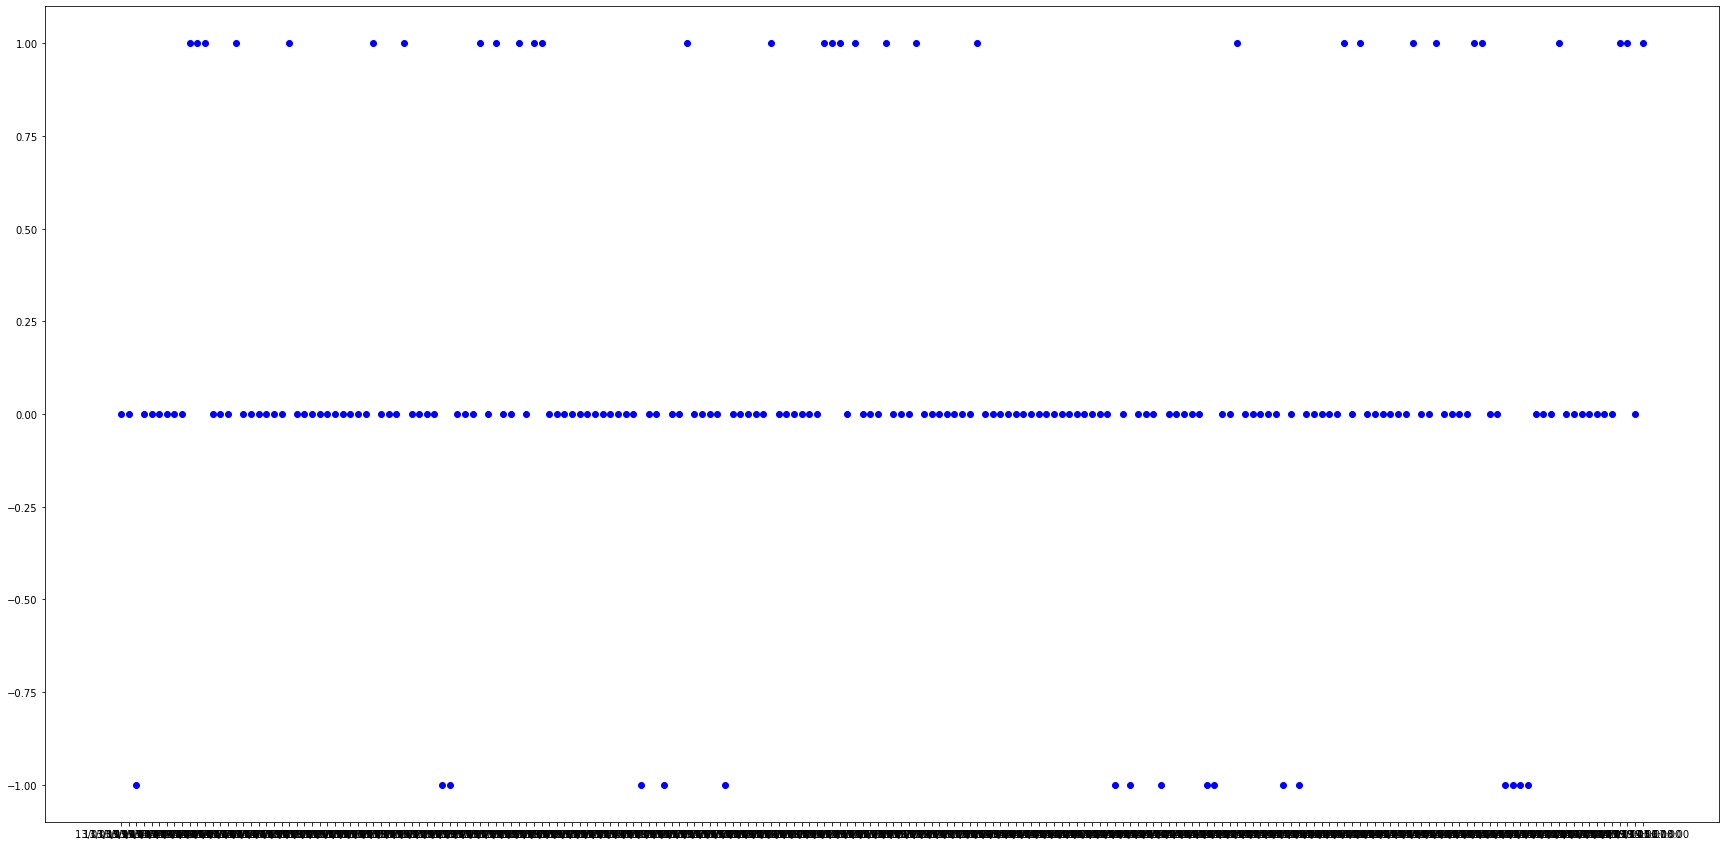

In [69]:
plt.figure(figsize=(30,15))
plt.plot(data.signal_predict.head(200),'bo')
plt.show()

ข้อมูล **SET50Update **Set50_20200821_20201019_1minute ****

In [70]:
used_features = ['Timestamp','SET50.Close','EMAV(5)','Vol','EMAV(Vol,5)','MACD(13,5,5)','EMAV(MACD,5)','RSI(14)']
data_update = pd.read_excel("/content/drive/My Drive/Set50_20200821_20201019_1minute.xlsx",usecols =used_features)
data_update.set_index("Timestamp",inplace=True)
data_predict=RandomForest.predict(data_update)
data_update['signal_predict']=data_predict
data_update.head(50)

,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)",signal_predict
Timestamp,,,,,,,,
21/08/20 09:55:00,846.79,842.4593,23247,79.8054,1.0899,8808.8906,0.223,0
21/08/20 09:56:00,847.98,844.2996,6228,82.0623,1.9857,7948.6600,0.810,0
21/08/20 09:57:00,847.41,845.3364,10173,77.5893,2.2945,8690.1597,1.305,0
21/08/20 09:58:00,847.80,846.1576,5606,78.4546,2.4360,7662.0968,1.682,0
21/08/20 09:59:00,846.04,846.1184,5190,66.0583,2.0656,6837.9002,1.810,0
21/08/20 10:00:00,846.95,846.3956,9205,68.8031,1.9289,7626.9218,1.850,0
21/08/20 10:01:00,846.77,846.5204,3271,67.6379,1.7247,6174.8415,1.808,0
21/08/20 10:02:00,846.32,846.4536,1756,64.6886,1.4401,4701.8917,1.685,0
21/08/20 10:03:00,845.91,846.2724,5545,62.0346,1.1308,4983.0208,1.500,0


ข้อมูล **SET50Update **Set50_20200920_20201104_1minute ****

In [71]:
used_features = ['Timestamp','SET50.Close','EMAV(5)','Vol','EMAV(Vol,5)','MACD(13,5,5)','EMAV(MACD,5)','RSI(14)']
data_update2= pd.read_excel("/content/drive/My Drive/Set50_20200920_20201104_1minute.xlsx",usecols =used_features)
data_update2.set_index("Timestamp",inplace=True)
data_update2.info()
data_predict=RandomForest.predict(data_update2)
data_update2['signal_predict']=data_predict
data_update2.tail(50)

<class 'pandas.core.frame.DataFrame'>
Index: 3104 entries, 20/10/20 09:58:00    to 2020-04-11 16:46:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SET50.Close   3104 non-null   float64
 1   EMAV(5)       3104 non-null   float64
 2   Vol           3104 non-null   int64  
 3   RSI(14)       3104 non-null   float64
 4   MACD(13,5,5)  3104 non-null   float64
 5   EMAV(Vol,5)   3104 non-null   float64
 6   EMAV(MACD,5)  3104 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 194.0+ KB


,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)",signal_predict
Timestamp,,,,,,,,
2020-04-11 15:47:00,765.50,765.4151,2717,52.7197,-0.0345,1997.7115,-0.019,0
2020-04-11 15:48:00,765.20,765.3434,4499,50.3107,-0.0706,2831.4160,-0.036,0
2020-04-11 15:49:00,765.53,765.4056,1454,52.8622,-0.0250,2372.2037,-0.033,0
2020-04-11 15:50:00,765.89,765.5671,1478,55.5442,0.0709,2074.0551,0.002,0
2020-04-11 15:51:00,766.08,765.7381,3056,56.9367,0.1584,2401.4874,0.054,1
2020-04-11 15:52:00,766.41,765.9620,2869,59.3202,0.2638,2557.2663,0.124,1
2020-04-11 15:53:00,766.27,766.0647,1875,57.8572,0.2848,2329.8798,0.178,0
2020-04-11 15:54:00,766.82,766.3165,16917,61.8391,0.3880,7192.3722,0.248,1
2020-04-11 15:55:00,767.63,766.7543,1202,66.8125,0.5827,5195.4438,0.359,0
